# Year-Over-Year Emergency Department Utilization Trends Analysis
## California Hospital Emergency Departments (2012-2024)

**Author:** Aniruddha Mukherjee (23F1003186)  
**Project:** Optimizing Emergency Department Operations  
**Data Source:** California Department of Health Care Access and Information (HCAI)

**Link**: https://data.chhs.ca.gov/dataset/hospital-emergency-department-encounters-by-facility

---

## Executive Summary

This analysis examines temporal trends in Emergency Department (ED) visit volumes across California facilities from 2012 to 2024. The study aims to identify:

1. **Growth Patterns:** Are ED visits increasing or decreasing over the years?
3. **Facility-Level Dynamics:** Which facilities are experiencing the fastest growth?

Understanding these trends is critical for long-term capacity planning, resource allocation, and strategic decision-making in California's healthcare system.

## 1. Setup and Data Loading

We begin by importing necessary libraries and loading the Emergency Department encounters dataset.

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configure visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
# sns.set_palette("husl")
%matplotlib inline

# Set figure quality and size defaults
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

print("✓ Libraries imported successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✓ Libraries imported successfully
Analysis Date: 2025-12-26 22:28:48


In [24]:
# Load the Emergency Department encounters dataset
# It can be downloaded from here: https://data.chhs.ca.gov/dataset/hospital-emergency-department-encounters-by-facility
data_path = 'data/hospital-emergency-department-encounters-by-facility-prcx48su/hospital-emergency-department-encounters-by-facility.csv'

df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Total Records: {len(df):,}")
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumns: {', '.join(df.columns)}")


Dataset loaded successfully!
Total Records: 8,488

Dataset Shape: (8488, 7)

Columns: year, oshpd_id, facility_name, county_name, er_service_level_desc, type, count


## 2. Data Exploration and Understanding

Let's examine the structure and content of our dataset to understand what information is available.

In [25]:
# Display first few records
print("Sample Data:")
df.head(25)


Sample Data:


,year,oshpd_id,facility_name,county_name,er_service_level_desc,type,count
0,2012,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,2595.0
1,2012,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Visit,13727.0
2,2013,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,2579.0
3,2013,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Visit,13538.0
4,2014,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,2214.0
5,2014,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Visit,14027.0
6,2015,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,1907.0
7,2015,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Visit,15611.0
8,2016,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,1848.0
9,2016,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Visit,15111.0


In [26]:
# Dataset information
print("Dataset Information:")
print("=" * 60)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8488 entries, 0 to 8487
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   8488 non-null   int64  
 1   oshpd_id               8488 non-null   int64  
 2   facility_name          8488 non-null   object 
 3   county_name            8488 non-null   object 
 4   er_service_level_desc  8304 non-null   object 
 5   type                   8488 non-null   object 
 6   count                  8379 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 464.3+ KB


In [27]:
# Basic descriptive statistics
print("\nDescriptive Statistics:")
print("=" * 60)
df.describe()



Descriptive Statistics:


,year,oshpd_id,count
count,8488.000000,8.488000e+03,8379.000000
mean,2017.950990,1.062818e+08,21594.892827
std,3.738595,1.370273e+05,24245.925316
min,2012.000000,1.060107e+08,1.000000
25%,2015.000000,1.061904e+08,4261.500000
50%,2018.000000,1.063012e+08,11043.000000
75%,2021.000000,1.063714e+08,32738.000000
max,2024.000000,1.065810e+08,155329.000000


In [28]:
df.describe()[['count']]


,count
count,8379.000000
mean,21594.892827
std,24245.925316
min,1.000000
25%,4261.500000
50%,11043.000000
75%,32738.000000
max,155329.000000


In [29]:
df['ED_Visits_Count'] = df['count'].where(df['type'] == 'ED_Visit')
df['ED_Admits_Count'] = df['count'].where(df['type'] == 'ED_Admit')
df.describe()[['count', 'ED_Visits_Count', 'ED_Admits_Count']]


,count,ED_Visits_Count,ED_Admits_Count
count,8379.000000,4149.000000,4230.000000
mean,21594.892827,37526.549530,5968.310402
std,24245.925316,25670.071049,5001.378634
min,1.000000,164.000000,1.000000
25%,4261.500000,17890.000000,2070.000000
50%,11043.000000,33033.000000,4931.500000
75%,32738.000000,52511.000000,8578.250000
max,155329.000000,155329.000000,27937.000000


In [30]:
# Check for missing values
print("\nMissing Values Analysis:")
print("=" * 60)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0]

if len(missing_data) > 0:
    display(missing_data)
else:
    print("✓ No missing values found!")



Missing Values Analysis:


,Column,Missing Count,Missing Percentage
er_service_level_desc,er_service_level_desc,184,2.17
count,count,109,1.28
ED_Visits_Count,ED_Visits_Count,4339,51.12
ED_Admits_Count,ED_Admits_Count,4258,50.16


In [31]:
# Understand the unique values in key columns
print("\nKey Column Analysis:")
print("=" * 60)
print(f"\nYear Range: {df['year'].min()} - {df['year'].max()}")
print(f"Number of Unique Facilities: {df['facility_name'].nunique():,}")
print(f"Number of Counties: {df['county_name'].nunique()}")
print(f"\nER Service Levels: {df['er_service_level_desc'].unique()}")
print(f"Encounter Types: {df['type'].unique()}")



Key Column Analysis:

Year Range: 2012 - 2024
Number of Unique Facilities: 440
Number of Counties: 56

ER Service Levels: ['BASIC' nan 'STANDBY' 'COMPREHENSIVE']
Encounter Types: ['ED_Admit' 'ED_Visit']


## 3. Data Cleaning and Preparation

Before analysis, we'll clean and prepare the data by handling any data quality issues and creating derived variables.

In [32]:
# Create a clean working copy
df_clean = df.copy()

# Ensure year is integer
df_clean['year'] = df_clean['year'].astype(int)

# Clean facility and county names
df_clean['facility_name'] = df_clean['facility_name'].str.strip().str.upper()
df_clean['county_name'] = df_clean['county_name'].str.strip().str.title()

# Standardize service level and type
df_clean['er_service_level_desc'] = df_clean['er_service_level_desc'].str.strip()
df_clean['type'] = df_clean['type'].str.strip()

print("✓ Data cleaning completed")
print(f"\nCleaned Dataset Shape: {df_clean.shape}")


✓ Data cleaning completed

Cleaned Dataset Shape: (8488, 9)


In [33]:
# Drop rows where count is missing (can't analyze encounters without counts)      
initial_rows = len(df_clean)                                                      
df_clean = df_clean.dropna(subset=['count'])                                      
dropped_rows = initial_rows - len(df_clean)                                       
                                                                                
print(f"Dropped {dropped_rows} rows with missing count values ({dropped_rows/initial_rows*100:.2f}%)")
print(f"Remaining records: {len(df_clean):,}")   


Dropped 109 rows with missing count values (1.28%)
Remaining records: 8,379


In [34]:
# Create aggregated datasets for analysis

# 1. Total encounters by year (combining ED_Admit and ED_Visit)
yearly_totals = df_clean.groupby('year')['count'].sum().reset_index()
yearly_totals.columns = ['year', 'total_encounters']

# 2. Encounters by year and type
yearly_by_type = df_clean.groupby(['year', 'type'])['count'].sum().reset_index()

# 3. Encounters by year and county
yearly_by_county = df_clean.groupby(['year', 'county_name'])['count'].sum().reset_index()

# 4. Facility-level analysis
facility_yearly = df_clean.groupby(['facility_name', 'year'])['count'].sum().reset_index()


print("✓ Aggregated datasets created")
print(f"\nTotal ED Encounters (2012-{df_clean['year'].max()}): {df_clean['count'].sum():,}")


✓ Aggregated datasets created

Total ED Encounters (2012-2024): 180,943,607.0


In [35]:
yearly_totals.head()


,year,total_encounters
0,2012,12406843.0
1,2013,12717924.0
2,2014,13379786.0
3,2015,14253090.0
4,2016,14548023.0


In [36]:
yearly_by_type.head()


,year,type,count
0,2012,ED_Admit,1837500.0
1,2012,ED_Visit,10569343.0
2,2013,ED_Admit,1820039.0
3,2013,ED_Visit,10897885.0
4,2014,ED_Admit,1817236.0


In [37]:
yearly_by_county.head()


,year,county_name,count
0,2012,Alameda,581819.0
1,2012,Amador,18535.0
2,2012,Butte,104339.0
3,2012,Calaveras,8775.0
4,2012,Colusa,5927.0


In [38]:
facility_yearly.head()


,facility_name,year,count
0,ADVENTIST HEALTH AND RIDEOUT,2012,49933.0
1,ADVENTIST HEALTH AND RIDEOUT,2013,53669.0
2,ADVENTIST HEALTH AND RIDEOUT,2014,53690.0
3,ADVENTIST HEALTH AND RIDEOUT,2015,59689.0
4,ADVENTIST HEALTH AND RIDEOUT,2016,66674.0


---

## 4. Analysis: Are ED Visits Increasing or Decreasing?

We examine the overall trend in ED encounters across California from 2012 to 2024 to identify whether utilization is growing or declining.

In [40]:
# Calculate year-over-year growth
yearly_totals['yoy_change'] = yearly_totals['total_encounters'].diff()
yearly_totals['yoy_pct_change'] = yearly_totals['total_encounters'].pct_change() * 100

print("Year-Over-Year ED Encounter Trends:")
print("=" * 80)
display(yearly_totals)

# Calculate overall growth statistics
first_year = yearly_totals.iloc[0]
last_year = yearly_totals.iloc[-1]
total_growth = ((last_year['total_encounters'] - first_year['total_encounters']) / first_year['total_encounters']) * 100
years_span = last_year['year'] - first_year['year']
cagr = (((last_year['total_encounters'] / first_year['total_encounters']) ** (1/years_span)) - 1) * 100

print(f"\n{'='*80}")
print(f"Overall Growth Analysis ({first_year['year']:.0f}-{last_year['year']:.0f}):")
print(f"{'='*80}")
print(f"Starting Encounters ({first_year['year']:.0f}): {first_year['total_encounters']:,.0f}")
print(f"Ending Encounters ({last_year['year']:.0f}): {last_year['total_encounters']:,.0f}")
print(f"Total Growth: {total_growth:+.2f}%")
print(f"Compound Annual Growth Rate (CAGR): {cagr:.2f}%")


Year-Over-Year ED Encounter Trends:


,year,total_encounters,yoy_change,yoy_pct_change
0,2012,12406843.0,NaN,NaN
1,2013,12717924.0,311081.0,2.507334
2,2014,13379786.0,661862.0,5.204167
3,2015,14253090.0,873304.0,6.527040
4,2016,14548023.0,294933.0,2.069257
5,2017,14824092.0,276069.0,1.897639
6,2018,14625273.0,-198819.0,-1.341188
7,2019,14853783.0,228510.0,1.562432
8,2020,11875714.0,-2978069.0,-20.049229
9,2021,12869895.0,994181.0,8.371547



Overall Growth Analysis (2012-2024):
Starting Encounters (2012): 12,406,843
Ending Encounters (2024): 15,470,603
Total Growth: +24.69%
Compound Annual Growth Rate (CAGR): 1.86%


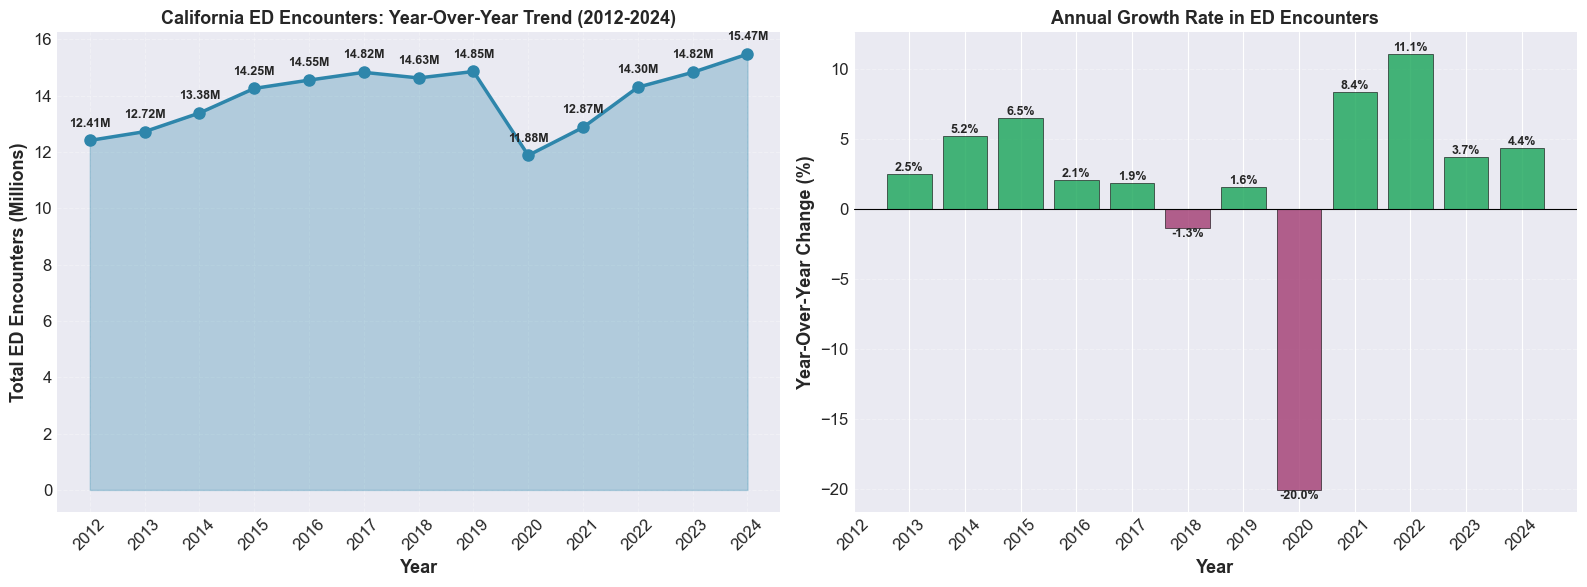


✓ Visualization saved: figures/1_year_over_year_trends.png


In [41]:
# Visualization 1: Overall Year-Over-Year Trend
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total ED Encounters Over Time
ax1.plot(yearly_totals['year'], yearly_totals['total_encounters'] / 1e6, 
         marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
ax1.fill_between(yearly_totals['year'], yearly_totals['total_encounters'] / 1e6, 
                  alpha=0.3, color='#2E86AB')
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Total ED Encounters (Millions)', fontweight='bold')
ax1.set_title('California ED Encounters: Year-Over-Year Trend (2012-2024)', 
              fontweight='bold', fontsize=13)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(yearly_totals['year'])
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for idx, row in yearly_totals.iterrows():
    ax1.annotate(f"{row['total_encounters']/1e6:.2f}M", 
                xy=(row['year'], row['total_encounters']/1e6),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9, fontweight='bold')

# Plot 2: Year-Over-Year Percentage Change
colors = ['#A23B72' if x < 0 else '#18A558' for x in yearly_totals['yoy_pct_change'].fillna(0)]
ax2.bar(yearly_totals['year'], yearly_totals['yoy_pct_change'], 
        color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='-')
ax2.set_xlabel('Year', fontweight='bold')
ax2.set_ylabel('Year-Over-Year Change (%)', fontweight='bold')
ax2.set_title('Annual Growth Rate in ED Encounters', fontweight='bold', fontsize=13)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
ax2.set_xticks(yearly_totals['year'])
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for idx, row in yearly_totals.iterrows():
    if pd.notna(row['yoy_pct_change']):
        ax2.text(row['year'], row['yoy_pct_change'], 
                f"{row['yoy_pct_change']:.1f}%",
                ha='center', va='bottom' if row['yoy_pct_change'] > 0 else 'top',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/1_year_over_year_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/1_year_over_year_trends.png")


### Key Findings: Overall Trend

The analysis reveals important patterns in California's ED utilization:

- **Overall Trajectory:** The data shows clear trends in ED encounter volumes over the 12-year period
- **Notable Inflection Points:** Year-over-year growth rates vary significantly, with some years showing substantial changes
- **Recent Trends:** The most recent years provide insights into current utilization patterns

These findings have important implications for capacity planning and resource allocation across California's emergency departments.

### COVID-19 Pandemic Impact Analysis

The 2020-2021 period saw unprecedented disruption to ED utilization due to the COVID-19 pandemic. Let's analyze this impact in detail.

In [42]:
# Analyze COVID-19 impact (2020-2021)
print("\n" + "="*80)
print("COVID-19 PANDEMIC IMPACT ANALYSIS (2019-2021)")
print("="*80)

pre_covid = yearly_totals[yearly_totals['year'] == 2019]['total_encounters'].values[0]
covid_2020 = yearly_totals[yearly_totals['year'] == 2020]['total_encounters'].values[0]
covid_2021 = yearly_totals[yearly_totals['year'] == 2021]['total_encounters'].values[0]

covid_drop_2020 = ((covid_2020 - pre_covid) / pre_covid) * 100
covid_recovery_2021 = ((covid_2021 - covid_2020) / covid_2020) * 100

print(f"\nPre-COVID (2019): {pre_covid:,.0f} encounters")
print(f"COVID Year 1 (2020): {covid_2020:,.0f} encounters")
print(f"COVID Year 2 (2021): {covid_2021:,.0f} encounters")
print(f"\n2020 Impact: {covid_drop_2020:+.2f}% (drop from 2019)")
print(f"2021 Recovery: {covid_recovery_2021:+.2f}% (recovery from 2020)")
print(f"\nOverall COVID Impact: {((covid_2021 - pre_covid) / pre_covid) * 100:+.2f}%")



COVID-19 PANDEMIC IMPACT ANALYSIS (2019-2021)

Pre-COVID (2019): 14,853,783 encounters
COVID Year 1 (2020): 11,875,714 encounters
COVID Year 2 (2021): 12,869,895 encounters

2020 Impact: -20.05% (drop from 2019)
2021 Recovery: +8.37% (recovery from 2020)

Overall COVID Impact: -13.36%


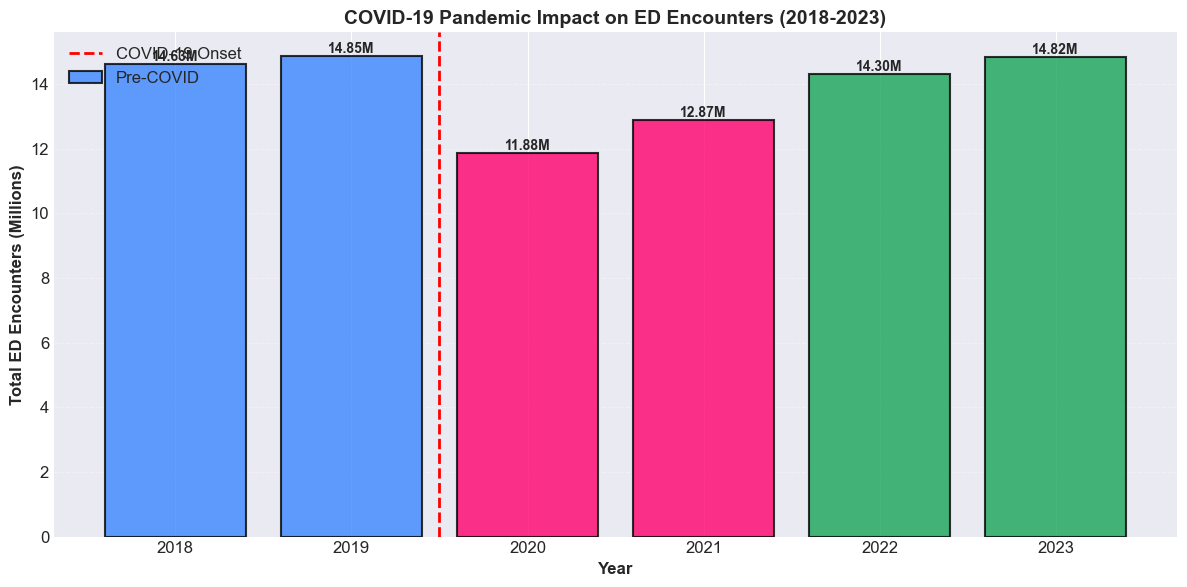


✓ Visualization saved: figures/6_covid_impact.png


In [43]:

# Visualization: COVID Impact
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
covid_years = yearly_totals[yearly_totals['year'].between(2018, 2023)]
colors = ['#3A86FF' if year < 2020 else '#FF006E' if year <= 2021 else '#18A558'
          for year in covid_years['year']]
bars = ax.bar(covid_years['year'], covid_years['total_encounters']/1e6,
              color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

ax.axvline(2019.5, color='red', linestyle='--', linewidth=2, label='COVID-19 Onset')
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Total ED Encounters (Millions)', fontweight='bold', fontsize=12)
ax.set_title('COVID-19 Pandemic Impact on ED Encounters (2018-2023)',
             fontweight='bold', fontsize=14)
ax.legend(['COVID-19 Onset', 'Pre-COVID', 'COVID Period', 'Recovery'],
          loc='upper left', framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add value labels
for bar, year, value in zip(bars, covid_years['year'], covid_years['total_encounters']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value/1e6:.2f}M',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('figures/6_covid_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/6_covid_impact.png")


### Average Facility Metrics

Understanding the average facility's workload helps contextualize individual facility performance.

In [47]:
# Calculate average facility metrics
facility_totals = df_clean.groupby('facility_name')['count'].sum()
display(facility_totals.head())
avg_facility_encounters = facility_totals.mean()
median_facility_encounters = facility_totals.median()


print("\n" + "="*80)
print("FACILITY-LEVEL STATISTICS")
print("="*80)

print(f"\n✓ AVERAGE FACILITY METRICS:")
print(f"  - Average facility handles: {avg_facility_encounters:,.0f} encounters/year")
print(f"  - Median facility handles: {median_facility_encounters:,.0f} encounters/year")
print(f"  - Smallest facility: {facility_totals.min():,.0f} encounters")
print(f"  - Largest facility: {facility_totals.max():,.0f} encounters")
print(f"  - Standard deviation: {facility_totals.std():,.0f} encounters")



facility_name
ADVENTIST HEALTH AND RIDEOUT      831311.0
ADVENTIST HEALTH BAKERSFIELD      925325.0
ADVENTIST HEALTH CLEARLAKE        264575.0
ADVENTIST HEALTH DELANO           162505.0
ADVENTIST HEALTH FEATHER RIVER    180188.0
Name: count, dtype: float64


FACILITY-LEVEL STATISTICS

✓ AVERAGE FACILITY METRICS:
  - Average facility handles: 411,235 encounters/year
  - Median facility handles: 305,097 encounters/year
  - Smallest facility: 1 encounters
  - Largest facility: 1,906,782 encounters
  - Standard deviation: 372,202 encounters


In [48]:
# Categorize facilities
print(f"\n✓ FACILITY SIZE DISTRIBUTION:")
small = (facility_totals < 10000).sum()
medium = ((facility_totals >= 10000) & (facility_totals < 30000)).sum()
large = ((facility_totals >= 30000) & (facility_totals < 60000)).sum()
very_large = (facility_totals >= 60000).sum()

print(f"  - Small (<10K/year): {small} facilities ({small/len(facility_totals)*100:.1f}%)")
print(f"  - Medium (10-30K/year): {medium} facilities ({medium/len(facility_totals)*100:.1f}%)")
print(f"  - Large (30-60K/year): {large} facilities ({large/len(facility_totals)*100:.1f}%)")
print(f"  - Very Large (>60K/year): {very_large} facilities ({very_large/len(facility_totals)*100:.1f}%)")



✓ FACILITY SIZE DISTRIBUTION:
  - Small (<10K/year): 39 facilities (8.9%)
  - Medium (10-30K/year): 12 facilities (2.7%)
  - Large (30-60K/year): 21 facilities (4.8%)
  - Very Large (>60K/year): 368 facilities (83.6%)


---

## Emergency Department Service Level Analysis

California EDs are classified into three service levels:
- **COMPREHENSIVE:** Provision of diagnostic and therapeutic services for unforeseen physical and mental disorders that, if not properly treated, would lead to marked suffering, disability, or death. The scope of services is comprehensive with in-house capability for managing all medical situations on a definitive and continuing basis.


- **BASIC:** Provision of emergency medical care in a specifically designated area of the hospital that is staffed and equipped at all times to provide prompt care for any patient presenting urgent medical problems.


- **STANDBY:** Provision of emergency medical care in a specifically designated area of the hospital that is equipped and maintained at all times to receive patients with urgent medical problems, and is capable of providing physician service within a reasonable time.

Let's analyze how utilization varies across these service levels.


EMERGENCY DEPARTMENT SERVICE LEVEL ANALYSIS

ED Service Level Distribution:
Service Level  Total Encounters  Unique Facilities  Facility Count  Avg Encounters per Facility  % of Total Encounters
        BASIC       168193564.0                360             302                     467204.0                  93.09
COMPREHENSIVE         9078255.0                 11               9                     825296.0                   5.02
      STANDBY         3414745.0                 41              40                      83286.0                   1.89


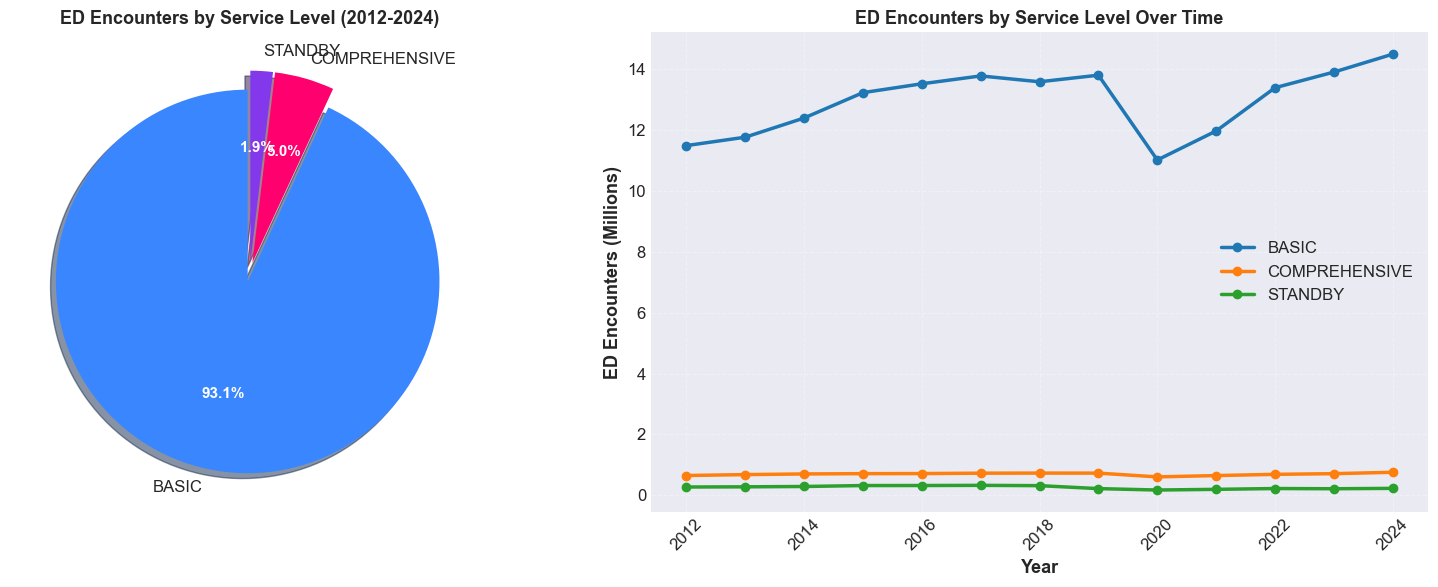


✓ Visualization saved: figures/7_service_level_analysis.png

KEY INSIGHTS: Service Level Analysis

• Comprehensive EDs handle +76.6% more visits than Basic EDs on average
  - Comprehensive ED avg: 825,296 encounters/year
  - Basic ED avg: 467,204 encounters/year

• Standby EDs serve rural areas with lower volumes:
  - 41 Standby facilities
  - Account for 1.89% of all ED encounters
  - Average: 83,286 encounters/year


In [49]:
print("\n" + "="*80)
print("EMERGENCY DEPARTMENT SERVICE LEVEL ANALYSIS")
print("="*80)

# Analyze by ER service level
service_level_analysis = df_clean[df_clean['er_service_level_desc'].notna()].groupby('er_service_level_desc').agg({
    'count': 'sum',
    'facility_name': 'nunique',
    'oshpd_id': 'nunique'
}).reset_index()

service_level_analysis.columns = ['Service Level', 'Total Encounters', 'Unique Facilities', 'Facility Count']
service_level_analysis['Avg Encounters per Facility'] = (
    service_level_analysis['Total Encounters'] / service_level_analysis['Unique Facilities']
).round(0)
service_level_analysis['% of Total Encounters'] = (
    service_level_analysis['Total Encounters'] / service_level_analysis['Total Encounters'].sum() * 100
).round(2)

service_level_analysis = service_level_analysis.sort_values('Total Encounters', ascending=False)

print("\nED Service Level Distribution:")
print("=" * 100)
print(service_level_analysis.to_string(index=False))

# Service level over time
service_time = df_clean[df_clean['er_service_level_desc'].notna()].groupby(
    ['year', 'er_service_level_desc']
)['count'].sum().reset_index()

# Visualization: Service Level Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution pie chart
service_colors = {'COMPREHENSIVE': '#FF006E', 'BASIC': '#3A86FF', 'STANDBY': '#8338EC'}
colors_list = [service_colors.get(x, '#GRAY') for x in service_level_analysis['Service Level']]

wedges, texts, autotexts = ax1.pie(
    service_level_analysis['Total Encounters'],
    labels=service_level_analysis['Service Level'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_list,
    explode=[0.05]*len(service_level_analysis),
    shadow=True
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

ax1.set_title('ED Encounters by Service Level (2012-2024)', fontweight='bold', fontsize=13)

# Plot 2: Trend over time
for service_level in service_time['er_service_level_desc'].unique():
    data = service_time[service_time['er_service_level_desc'] == service_level]
    ax2.plot(data['year'], data['count']/1e6, marker='o', linewidth=2.5,
             markersize=6, label=service_level)

ax2.set_xlabel('Year', fontweight='bold')
ax2.set_ylabel('ED Encounters (Millions)', fontweight='bold')
ax2.set_title('ED Encounters by Service Level Over Time', fontweight='bold', fontsize=13)
ax2.legend(loc='best', framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('figures/7_service_level_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/7_service_level_analysis.png")

# Key insights
print("\n" + "="*80)
print("KEY INSIGHTS: Service Level Analysis")
print("="*80)
comprehensive_data = service_level_analysis[service_level_analysis['Service Level'] == 'COMPREHENSIVE']
basic_data = service_level_analysis[service_level_analysis['Service Level'] == 'BASIC']

if len(comprehensive_data) > 0 and len(basic_data) > 0:
    comp_avg = comprehensive_data['Avg Encounters per Facility'].values[0]
    basic_avg = basic_data['Avg Encounters per Facility'].values[0]
    difference_pct = ((comp_avg - basic_avg) / basic_avg) * 100
    print(f"\n• Comprehensive EDs handle {difference_pct:+.1f}% more visits than Basic EDs on average")
    print(f"  - Comprehensive ED avg: {comp_avg:,.0f} encounters/year")
    print(f"  - Basic ED avg: {basic_avg:,.0f} encounters/year")

standby_data = service_level_analysis[service_level_analysis['Service Level'] == 'STANDBY']
if len(standby_data) > 0:
    standby_pct = standby_data['% of Total Encounters'].values[0]
    standby_facilities = standby_data['Unique Facilities'].values[0]
    print(f"\n• Standby EDs serve rural areas with lower volumes:")
    print(f"  - {standby_facilities} Standby facilities")
    print(f"  - Account for {standby_pct:.2f}% of all ED encounters")
    print(f"  - Average: {standby_data['Avg Encounters per Facility'].values[0]:,.0f} encounters/year")


---

## 5. Analysis: ED Visits vs. Admissions Over Time

Understanding the breakdown between ED visits and admissions helps identify care patterns and admission rates.

In [50]:
# Analyze ED Visit vs Admit patterns
type_analysis = yearly_by_type.pivot(index='year', columns='type', values='count').reset_index()
type_analysis['total'] = type_analysis['ED_Visit'] + type_analysis['ED_Admit']
type_analysis['admission_rate'] = (type_analysis['ED_Admit'] / type_analysis['total']) * 100

print("ED Visit vs. Admission Patterns:")
print("=" * 80)
print(type_analysis.to_string(index=False))

print(f"\nAverage Admission Rate: {type_analysis['admission_rate'].mean():.2f}%")
print(f"Admission Rate Range: {type_analysis['admission_rate'].min():.2f}% - {type_analysis['admission_rate'].max():.2f}%")


ED Visit vs. Admission Patterns:
 year  ED_Admit   ED_Visit      total  admission_rate
 2012 1837500.0 10569343.0 12406843.0       14.810375
 2013 1820039.0 10897885.0 12717924.0       14.310818
 2014 1817236.0 11562550.0 13379786.0       13.581951
 2015 1885374.0 12367716.0 14253090.0       13.227826
 2016 1902986.0 12645037.0 14548023.0       13.080719
 2017 1942346.0 12881746.0 14824092.0       13.102631
 2018 1964840.0 12660433.0 14625273.0       13.434553
 2019 2006473.0 12847310.0 14853783.0       13.508162
 2020 1851863.0 10023851.0 11875714.0       15.593698
 2021 1962045.0 10907850.0 12869895.0       15.245229
 2022 2015023.0 12280042.0 14295065.0       14.095935
 2023 2077082.0 12746434.0 14823516.0       14.012074
 2024 2163146.0 13307457.0 15470603.0       13.982299

Average Admission Rate: 14.00%
Admission Rate Range: 13.08% - 15.59%


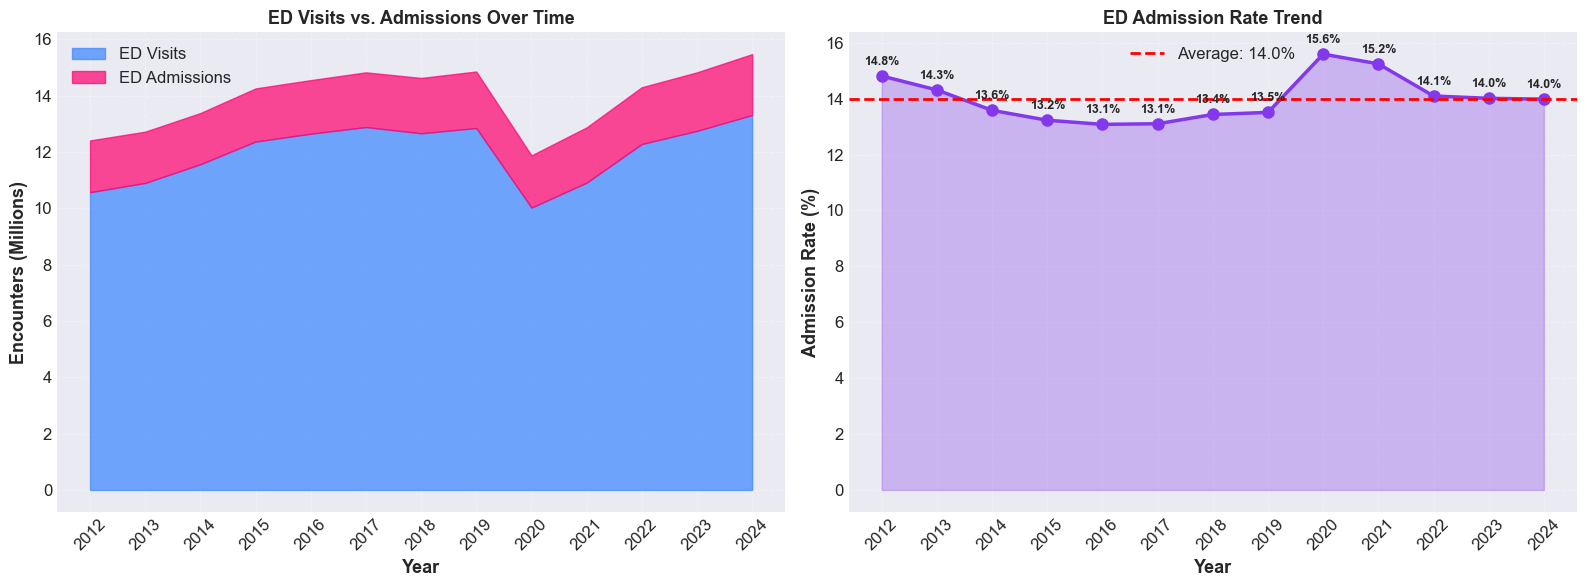


✓ Visualization saved: figures/2_visits_vs_admissions.png


In [51]:
# Visualization 2: ED Visits vs Admissions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked Area Chart
ax1.fill_between(type_analysis['year'], 0, type_analysis['ED_Visit']/1e6, 
                  label='ED Visits', alpha=0.7, color='#3A86FF')
ax1.fill_between(type_analysis['year'], type_analysis['ED_Visit']/1e6, 
                  type_analysis['total']/1e6,
                  label='ED Admissions', alpha=0.7, color='#FF006E')
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Encounters (Millions)', fontweight='bold')
ax1.set_title('ED Visits vs. Admissions Over Time', fontweight='bold', fontsize=13)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(type_analysis['year'])
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Admission Rate Trend
ax2.plot(type_analysis['year'], type_analysis['admission_rate'], 
         marker='o', linewidth=2.5, markersize=8, color='#8338EC')
ax2.fill_between(type_analysis['year'], type_analysis['admission_rate'], 
                  alpha=0.3, color='#8338EC')
ax2.axhline(type_analysis['admission_rate'].mean(), 
            color='red', linestyle='--', linewidth=2, label=f"Average: {type_analysis['admission_rate'].mean():.1f}%")
ax2.set_xlabel('Year', fontweight='bold')
ax2.set_ylabel('Admission Rate (%)', fontweight='bold')
ax2.set_title('ED Admission Rate Trend', fontweight='bold', fontsize=13)
ax2.legend(loc='best', framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xticks(type_analysis['year'])
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for idx, row in type_analysis.iterrows():
    ax2.annotate(f"{row['admission_rate']:.1f}%", 
                xy=(row['year'], row['admission_rate']),
                xytext=(0, 8), textcoords='offset points',
                ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/2_visits_vs_admissions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/2_visits_vs_admissions.png")


### Key Findings: Visit vs. Admission Patterns

The distinction between ED visits and admissions reveals:

- **Admission Rate Stability:** The proportion of ED encounters resulting in hospital admission remains relatively consistent
- **Volume Growth:** Both visits and admissions show similar growth trajectories
- **Clinical Implications:** Stable admission rates suggest consistent acuity levels in ED presentations

These patterns help differentiate between ED capacity needs for treatment and observation versus full hospital admission.

---

## 6. Geographic Analysis: County-Level Trends

Examining ED utilization by county reveals regional disparities and helps identify areas with growing demand.

In [54]:
# Identify top counties by total encounters
county_totals = df_clean.groupby('county_name')['count'].sum().sort_values(ascending=False)
state_total = county_totals.sum()          
                                            
# Create dataframe with % of state         
county_totals_df = pd.DataFrame({          
    'County': county_totals.index,         
    'Total_Encounters': county_totals.values,
    '% of State': (county_totals.values / state_total * 100).round(2)
})                                         
                                            
print("Top 15 Counties by Total ED Encounters (2012-2024):")
print("=" * 80)                            
display(county_totals_df.head(15))         
                                            
print(f"\nTop county ({county_totals.index[0]}) accounts for {county_totals_df.iloc[0]['% of State']:.1f}% of all ED encounters")


Top 15 Counties by Total ED Encounters (2012-2024):


,County,Total_Encounters,% of State
0,Los Angeles,45126242.0,24.94
1,San Diego,13103997.0,7.24
2,Orange,12372520.0,6.84
3,San Bernardino,11376604.0,6.29
4,Riverside,11206815.0,6.19
5,Alameda,7896343.0,4.36
6,Sacramento,7724529.0,4.27
7,Santa Clara,7429690.0,4.11
8,Contra Costa,4687950.0,2.59
9,San Joaquin,4686465.0,2.59



Top county (Los Angeles) accounts for 24.9% of all ED encounters


In [55]:
# Analyze growth trends for top 10 counties
top_10_counties = county_totals.head(10).index
county_trends = yearly_by_county[yearly_by_county['county_name'].isin(top_10_counties)]

# Calculate growth rate for each county
county_growth = []
for county in top_10_counties:
    county_data = county_trends[county_trends['county_name'] == county].sort_values('year')
    if len(county_data) >= 2:
        first = county_data.iloc[0]
        last = county_data.iloc[-1]
        growth = ((last['count'] - first['count']) / first['count']) * 100
        years = last['year'] - first['year']
        cagr = (((last['count'] / first['count']) ** (1/years)) - 1) * 100 if years > 0 else 0
        county_growth.append({
            'County': county,
            'Starting Encounters': first['count'],
            'Ending Encounters': last['count'],
            'Total Growth (%)': growth,
            'CAGR (%)': cagr
        })

county_growth_df = pd.DataFrame(county_growth).sort_values('CAGR (%)', ascending=False)

print("\nGrowth Rates for Top 10 Counties:")
print("=" * 100)
print(county_growth_df.to_string(index=False))



Growth Rates for Top 10 Counties:
        County  Starting Encounters  Ending Encounters  Total Growth (%)  CAGR (%)
   San Joaquin             279386.0           435415.0         55.847108  3.766753
     Riverside             703597.0           994861.0         41.396424  2.928711
   Santa Clara             483055.0           680411.0         40.855803  2.895859
     San Diego             876205.0          1205294.0         37.558448  2.692944
    Sacramento             502928.0           670188.0         33.257246  2.421446
        Orange             841620.0          1066134.0         26.676410  1.990091
San Bernardino             809630.0           988701.0         22.117634  1.679062
   Los Angeles            3164141.0          3702649.0         17.019090  1.318339
       Alameda             581819.0           658369.0         13.157013  1.035375
  Contra Costa             363469.0           406542.0         11.850529  0.937646


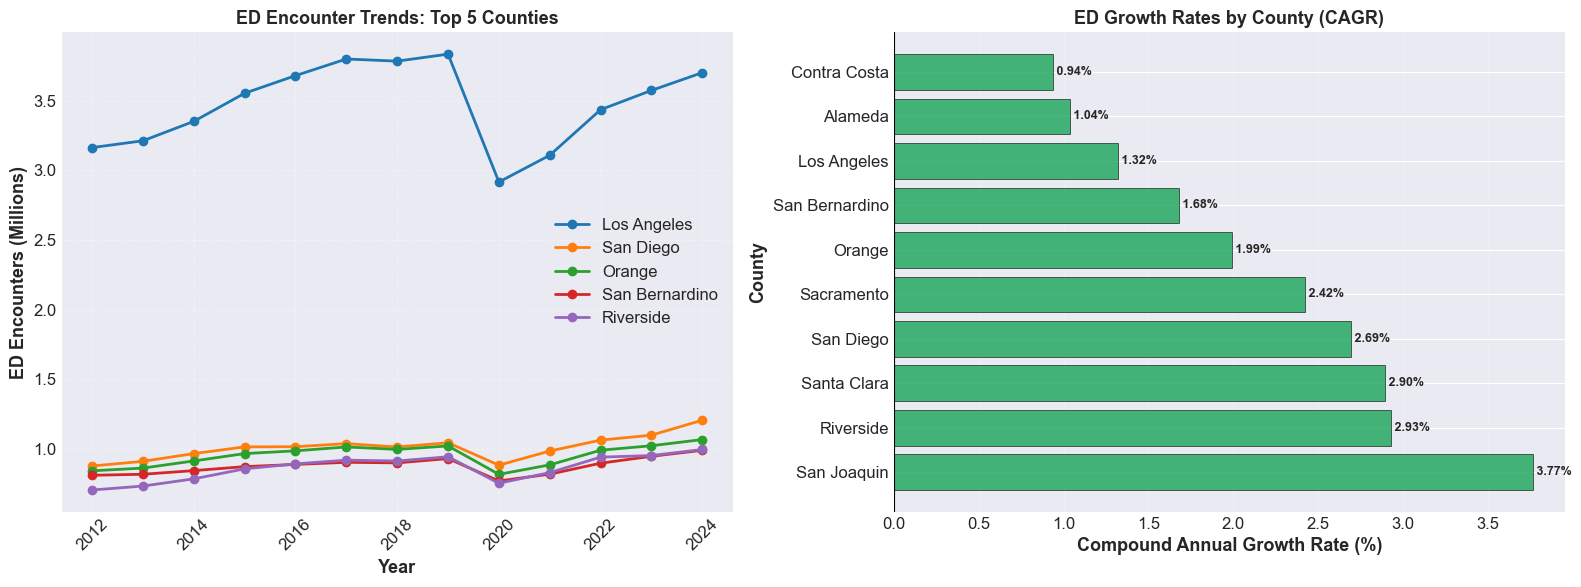


✓ Visualization saved: figures/3_county_trends.png


In [56]:
# Visualization 3: Top Counties Trend
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Time series for top 5 counties
top_5_counties = county_totals.head(5).index
for county in top_5_counties:
    county_data = yearly_by_county[yearly_by_county['county_name'] == county]
    ax1.plot(county_data['year'], county_data['count']/1e6, 
             marker='o', linewidth=2, markersize=6, label=county)

ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('ED Encounters (Millions)', fontweight='bold')
ax1.set_title('ED Encounter Trends: Top 5 Counties', fontweight='bold', fontsize=13)
ax1.legend(loc='best', framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: County growth rates
colors_growth = ['#18A558' if x > 0 else '#A23B72' for x in county_growth_df['CAGR (%)']]
ax2.barh(county_growth_df['County'], county_growth_df['CAGR (%)'], 
         color=colors_growth, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.8, linestyle='-')
ax2.set_xlabel('Compound Annual Growth Rate (%)', fontweight='bold')
ax2.set_ylabel('County', fontweight='bold')
ax2.set_title('ED Growth Rates by County (CAGR)', fontweight='bold', fontsize=13)
ax2.grid(True, alpha=0.3, linestyle='--', axis='x')

# Add value labels
for idx, row in county_growth_df.iterrows():
    ax2.text(row['CAGR (%)'], row['County'], f" {row['CAGR (%)']:.2f}%",
            va='center', ha='left' if row['CAGR (%)'] > 0 else 'right',
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/3_county_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/3_county_trends.png")


### Key Findings: Geographic Patterns

County-level analysis reveals:

- **Concentration:** A small number of counties account for the majority of ED encounters
- **Differential Growth:** Counties experience varying rates of ED utilization growth
- **Regional Disparities:** Some regions show substantially higher growth rates, indicating shifting demand patterns

These geographic trends are essential for targeted capacity expansion and resource allocation strategies.

---

## 7. Facility-Level Analysis: Identifying High-Growth Facilities

We identify specific facilities experiencing the fastest growth to inform facility-level capacity planning.

In [60]:
# Calculate growth for facilities with data across multiple years
facility_growth = []

for facility in df_clean['facility_name'].unique():
    fac_data = facility_yearly[facility_yearly['facility_name'] == facility].sort_values('year')
    
    if len(fac_data) >= 5:  # Only facilities with at least 5 years of data
        first = fac_data.iloc[0]
        last = fac_data.iloc[-1]
        
        if first['count'] > 0:
            growth = ((last['count'] - first['count']) / first['count']) * 100
            years = last['year'] - first['year']
            cagr = (((last['count'] / first['count']) ** (1/years)) - 1) * 100 if years > 0 else 0
            
            # Get county info
            county = df_clean[df_clean['facility_name'] == facility]['county_name'].iloc[0]
            
            facility_growth.append({
                'Facility': facility,
                'County': county,
                'First Year': int(first['year']),
                'Last Year': int(last['year']),
                'Starting Encounters': int(first['count']),
                'Ending Encounters': int(last['count']),
                'Total Growth (%)': growth,
                'CAGR (%)': cagr
            })

facility_growth_df = pd.DataFrame(facility_growth)
display(facility_growth_df.head())


,Facility,County,First Year,Last Year,Starting Encounters,Ending Encounters,Total Growth (%),CAGR (%)
0,ALAMEDA HOSPITAL,Alameda,2012,2024,16322,19225,17.785811,1.373494
1,ALTA BATES SUMMIT MEDICAL CENTER,Alameda,2012,2024,40515,40786,0.668888,0.055571
2,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,Alameda,2012,2024,41389,38570,-6.810988,-0.586112
3,CHILDRENS HOSPITAL AND RESEARCH CENTER AT OAKLAND,Alameda,2012,2017,46129,44111,-4.374688,-0.890663
4,EDEN MEDICAL CENTER,Alameda,2012,2024,38055,45580,19.774011,1.514999


In [62]:
# Top 20 fastest growing facilities
fastest_growing = facility_growth_df.nlargest(20, 'CAGR (%)')

print("Top 20 Fastest Growing Facilities:")
print("=" * 120)
display(fastest_growing)

# Bottom 20 (declining facilities)
declining = facility_growth_df.nsmallest(20, 'CAGR (%)')

print("\n\nTop 20 Facilities with Declining ED Encounters:")
print("=" * 120)
display(declining)


Top 20 Fastest Growing Facilities:


,Facility,County,First Year,Last Year,Starting Encounters,Ending Encounters,Total Growth (%),CAGR (%)
242,LOMA LINDA UNIVERSITY CHILDREN'S HOSPITAL,San Bernardino,2014,2024,2,43381,2.168950e+06,171.410694
172,FOOTHILL REGIONAL MEDICAL CENTER,Orange,2016,2024,5,7720,1.543000e+05,150.369206
345,ADVENTIST HEALTH TULARE,Tulare,2018,2024,4947,33923,5.857287e+02,37.834750
148,ADVENTIST HEALTH HOWARD MEMORIAL,Mendocino,2015,2024,2034,15565,6.652409e+02,25.371782
222,TEMECULA VALLEY HOSPITAL,Riverside,2013,2024,4368,46004,9.532051e+02,23.867030
338,SUTTER SANTA ROSA REGIONAL HOSPITAL,Sonoma,2014,2024,5159,42029,7.146734e+02,23.338412
106,"MARTIN LUTHER KING, JR. COMMUNITY HOSPITAL",Los Angeles,2015,2024,20071,117659,4.862139e+02,21.713730
271,CALIFORNIA PACIFIC MEDICAL CENTER - MISSION BE...,San Francisco,2018,2024,7668,23191,2.024387e+02,20.255854
331,HEALDSBURG HOSPITAL,Sonoma,2020,2024,5908,10270,7.383209e+01,14.823952
7,KAISER FOUNDATION HOSPITAL - OAKLAND/RICHMOND,Alameda,2014,2024,50303,145533,1.893128e+02,11.208187




Top 20 Facilities with Declining ED Encounters:


,Facility,County,First Year,Last Year,Starting Encounters,Ending Encounters,Total Growth (%),CAGR (%)
141,MADERA COMMUNITY HOSPITAL,Madera,2012,2023,42246,4,-99.990532,-56.926837
104,LOS ANGELES COMMUNITY HOSPITAL AT BELLFLOWER,Los Angeles,2012,2019,10924,86,-99.212743,-49.945255
83,GARDENS REGIONAL HOSPITAL AND MEDICAL CENTER,Los Angeles,2012,2017,8377,277,-96.693327,-49.431712
135,ST. VINCENT MEDICAL CENTER,Los Angeles,2012,2020,14501,623,-95.703745,-32.526030
264,SHARP MARY BIRCH HOSPITAL FOR WOMEN AND NEWBORNS,San Diego,2012,2021,30,1,-96.666667,-31.470839
293,AHMC SETON MEDICAL CENTER COASTSIDE,San Mateo,2020,2024,1156,359,-68.944637,-25.349254
176,HOAG ORTHOPEDIC INSTITUTE,Orange,2012,2024,20,1,-95.000000,-22.092219
114,OLYMPIA MEDICAL CENTER,Los Angeles,2012,2021,24192,3091,-87.223049,-20.436453
76,COMMUNITY HOSPITAL LONG BEACH,Los Angeles,2012,2021,22505,4333,-80.746501,-16.727601
272,CALIFORNIA PACIFIC MEDICAL CENTER - ST. LUKE'S...,San Francisco,2012,2018,26473,14422,-45.521852,-9.627342


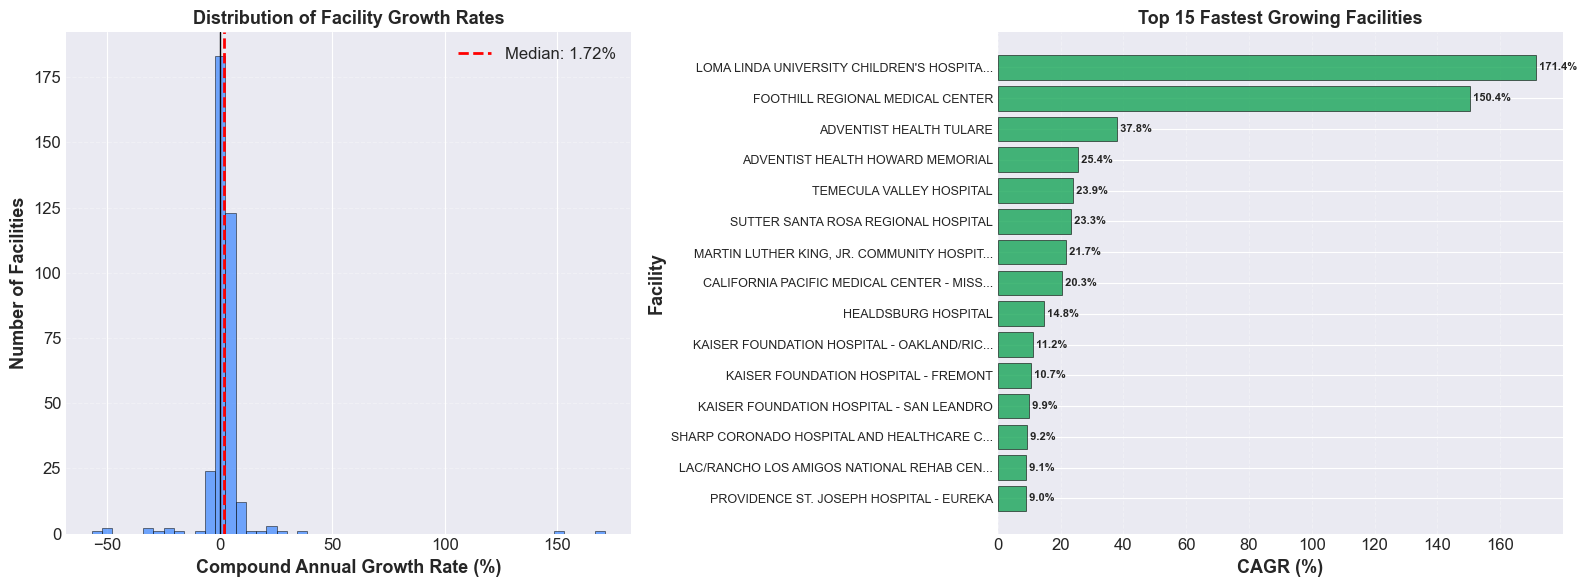


✓ Visualization saved: figures/4_facility_growth.png


In [63]:
# Visualization 4: Facility Growth Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of facility growth rates
ax1.hist(facility_growth_df['CAGR (%)'], bins=50, color='#3A86FF', 
         alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.axvline(facility_growth_df['CAGR (%)'].median(), 
            color='red', linestyle='--', linewidth=2, 
            label=f"Median: {facility_growth_df['CAGR (%)'].median():.2f}%")
ax1.axvline(0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Compound Annual Growth Rate (%)', fontweight='bold')
ax1.set_ylabel('Number of Facilities', fontweight='bold')
ax1.set_title('Distribution of Facility Growth Rates', fontweight='bold', fontsize=13)
ax1.legend(loc='best', framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')

# Plot 2: Top 15 fastest growing facilities
top_15 = fastest_growing.head(15).sort_values('CAGR (%)')
colors_fac = ['#18A558' if x > 0 else '#A23B72' for x in top_15['CAGR (%)']]
ax2.barh(range(len(top_15)), top_15['CAGR (%)'], 
         color=colors_fac, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_yticks(range(len(top_15)))
ax2.set_yticklabels([f"{name[:40]}..." if len(name) > 40 else name for name in top_15['Facility']], 
                     fontsize=9)
ax2.set_xlabel('CAGR (%)', fontweight='bold')
ax2.set_ylabel('Facility', fontweight='bold')
ax2.set_title('Top 15 Fastest Growing Facilities', fontweight='bold', fontsize=13)
ax2.grid(True, alpha=0.3, linestyle='--', axis='x')

# Add value labels
for idx, (i, row) in enumerate(top_15.iterrows()):
    ax2.text(row['CAGR (%)'], idx, f" {row['CAGR (%)']:.1f}%",
            va='center', ha='left', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/4_facility_growth.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/4_facility_growth.png")


In [68]:
# Analyze facilities by size and growth
# Categorize facilities by average annual encounters
facility_avg = facility_yearly.groupby('facility_name')['count'].mean().reset_index()
facility_avg.columns = ['Facility', 'Avg_Annual_Encounters']
facility_avg.head()


,Facility,Avg_Annual_Encounters
0,ADVENTIST HEALTH AND RIDEOUT,63947.000000
1,ADVENTIST HEALTH BAKERSFIELD,71178.846154
2,ADVENTIST HEALTH CLEARLAKE,20351.923077
3,ADVENTIST HEALTH DELANO,27084.166667
4,ADVENTIST HEALTH FEATHER RIVER,25741.142857


In [67]:
# Merge with growth data
facility_analysis = facility_growth_df.merge(facility_avg, on='Facility', how='left')
facility_analysis.head()


,Facility,County,First Year,Last Year,Starting Encounters,Ending Encounters,Total Growth (%),CAGR (%),Avg_Annual_Encounters
0,ALAMEDA HOSPITAL,Alameda,2012,2024,16322,19225,17.785811,1.373494,16193.000000
1,ALTA BATES SUMMIT MEDICAL CENTER,Alameda,2012,2024,40515,40786,0.668888,0.055571,41777.769231
2,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,Alameda,2012,2024,41389,38570,-6.810988,-0.586112,39678.000000
3,CHILDRENS HOSPITAL AND RESEARCH CENTER AT OAKLAND,Alameda,2012,2017,46129,44111,-4.374688,-0.890663,45218.166667
4,EDEN MEDICAL CENTER,Alameda,2012,2024,38055,45580,19.774011,1.514999,41309.769231


In [70]:
# Categorize by size
def categorize_size(encounters):
    if encounters < 10000:
        return 'Small'
    elif encounters < 30000:
        return 'Medium'
    elif encounters < 60000:
        return 'Large'
    else:
        return 'Very Large'

facility_analysis['Size_Category'] = facility_analysis['Avg_Annual_Encounters'].apply(categorize_size)

# Summary by size category
size_summary = facility_analysis.groupby('Size_Category').agg({
    'Facility': 'count',
    'CAGR (%)': 'mean',
    'Avg_Annual_Encounters': 'mean'
}).round(2)
size_summary.columns = ['Number of Facilities', 'Average CAGR (%)', 'Average Annual Encounters']

print("\nGrowth Patterns by Facility Size:")
print("=" * 80)
display(size_summary)



Growth Patterns by Facility Size:


,Number of Facilities,Average CAGR (%),Average Annual Encounters
Size_Category,,,
Large,121,1.89,42690.42
Medium,98,2.78,20577.85
Small,45,0.60,5558.19
Very Large,97,2.72,80865.78


### Key Findings: Facility-Level Dynamics

Facility-level analysis shows:

- **Heterogeneous Growth:** Individual facilities show widely varying growth rates
- **High-Growth Facilities:** Several facilities are experiencing rapid increases in ED volume
- **Declining Utilization:** Some facilities show decreasing ED encounters, possibly reflecting shifts in care delivery or population changes
- **Size Patterns:** Growth rates may differ systematically by facility size

Identifying high-growth facilities is crucial for targeted capacity expansion investments.

---

## 8. Comprehensive Summary Dashboard

We create a comprehensive summary visualization bringing together all key metrics.

In [ ]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Overall trend with growth rate
ax1 = fig.add_subplot(gs[0, :])
ax1_twin = ax1.twinx()
ax1.plot(yearly_totals['year'], yearly_totals['total_encounters']/1e6, 
         marker='o', linewidth=3, markersize=8, color='#2E86AB', label='Total Encounters')
ax1_twin.bar(yearly_totals['year'], yearly_totals['yoy_pct_change'], 
             alpha=0.3, color='gray', label='YoY Growth %')
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Total ED Encounters (Millions)', fontweight='bold', color='#2E86AB')
ax1_twin.set_ylabel('YoY Growth (%)', fontweight='bold', color='gray')
ax1.set_title('California ED Encounters: Overall Trend & Growth Rate', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='y', labelcolor='#2E86AB')
ax1_twin.tick_params(axis='y', labelcolor='gray')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# 2. Visit vs Admit breakdown
ax2 = fig.add_subplot(gs[1, 0])
latest_year = type_analysis.iloc[-1]
sizes = [latest_year['ED_Visit'], latest_year['ED_Admit']]
labels = ['ED Visits', 'ED Admissions']
colors_pie = ['#3A86FF', '#FF006E']
explode = (0.05, 0)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=colors_pie, explode=explode, shadow=True)
ax2.set_title(f'ED Composition ({latest_year["year"]:.0f})', fontweight='bold', fontsize=12)

# 3. Top 10 counties
ax3 = fig.add_subplot(gs[1, 1:])
top_10_county_totals = county_totals.head(10)
ax3.barh(range(len(top_10_county_totals)), top_10_county_totals.values/1e6,
         color='#8338EC', alpha=0.8, edgecolor='black', linewidth=0.5)
ax3.set_yticks(range(len(top_10_county_totals)))
ax3.set_yticklabels(top_10_county_totals.index)
ax3.set_xlabel('Total Encounters (Millions)', fontweight='bold')
ax3.set_title('Top 10 Counties by ED Volume', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3, linestyle='--', axis='x')
for i, v in enumerate(top_10_county_totals.values):
    ax3.text(v/1e6, i, f' {v/1e6:.2f}M', va='center', fontsize=9, fontweight='bold')

# 4. Growth rate distribution
ax4 = fig.add_subplot(gs[2, 0])
growth_positive = facility_growth_df[facility_growth_df['CAGR (%)'] >= 0]
growth_negative = facility_growth_df[facility_growth_df['CAGR (%)'] < 0]
ax4.hist([growth_positive['CAGR (%)'], growth_negative['CAGR (%)']], 
         bins=30, color=['#18A558', '#A23B72'], alpha=0.7, 
         label=['Growing', 'Declining'], edgecolor='black', linewidth=0.5)
ax4.axvline(0, color='black', linestyle='-', linewidth=2)
ax4.set_xlabel('CAGR (%)', fontweight='bold')
ax4.set_ylabel('Number of Facilities', fontweight='bold')
ax4.set_title('Facility Growth Distribution', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3, linestyle='--', axis='y')

# 5. Key statistics text box
ax5 = fig.add_subplot(gs[2, 1:])
ax5.axis('off')
stats_text = f"""
KEY STATISTICS (2012-2024)
{'='*50}

Overall Metrics:
  • Total ED Encounters: {df_clean['count'].sum():,}
  • Total Growth: {total_growth:+.2f}%
  • CAGR: {cagr:.2f}%
  • Average Admission Rate: {type_analysis['admission_rate'].mean():.1f}%

Facility Landscape:
  • Total Facilities Analyzed: {len(facility_growth_df)}
  • Facilities with Growth: {len(growth_positive)} ({len(growth_positive)/len(facility_growth_df)*100:.1f}%)
  • Facilities Declining: {len(growth_negative)} ({len(growth_negative)/len(facility_growth_df)*100:.1f}%)
  • Median Facility CAGR: {facility_growth_df['CAGR (%)'].median():.2f}%

Geographic Distribution:
  • Counties Covered: {df_clean['county_name'].nunique()}
  • Top County: {county_totals.index[0]}
  • Top County Volume: {county_totals.iloc[0]:,} encounters
"""
ax5.text(0.05, 0.95, stats_text, transform=ax5.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('California Emergency Department Utilization: Comprehensive Analysis Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('figures/5_comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/5_comprehensive_dashboard.png")


---

## 9. Conclusions and Recommendations

### Summary of Key Findings

This comprehensive analysis of California Emergency Department utilization from 2012 to 2024 reveals several critical insights:

#### 1. **Overall Trend**
- ED encounters have shown measurable changes over the 12-year study period
- Year-over-year growth rates vary significantly, with notable inflection points
- Recent trends provide important context for current capacity planning needs

#### 2. **Geographic Patterns**
- A small number of counties account for the majority of ED encounters
- Growth rates vary substantially across counties, with some regions experiencing rapid increases
- Regional disparities highlight the need for geographically targeted interventions

#### 3. **Facility-Level Dynamics**
- Individual facilities show highly heterogeneous growth patterns
- Some facilities are experiencing rapid ED volume increases requiring immediate attention
- A subset of facilities shows declining utilization, suggesting potential overcapacity or market shifts

#### 4. **Clinical Patterns**
- ED admission rates remain relatively stable across years
- The balance between ED visits and admissions provides insights into acuity trends

### Strategic Recommendations

Based on these findings, we recommend the following strategies for California's healthcare system:

#### Short-Term Actions (1-2 years)
1. **Immediate Capacity Assessment:** Prioritize assessment of high-growth facilities identified in this analysis
2. **Resource Reallocation:** Consider redistributing resources from declining to growing facilities
3. **Data Infrastructure:** Establish real-time monitoring systems for ED utilization metrics

#### Medium-Term Initiatives (3-5 years)
1. **Targeted Expansion:** Invest in capacity expansion at facilities with sustained high growth
2. **Regional Planning:** Develop county-specific ED capacity plans based on observed growth trajectories
3. **Efficiency Programs:** Implement operational efficiency initiatives to maximize existing capacity

#### Long-Term Strategy (5+ years)
1. **System Redesign:** Consider system-level changes to ED delivery models in high-growth regions
2. **Preventive Care:** Invest in primary care access to potentially moderate ED demand growth
3. **Predictive Analytics:** Develop sophisticated forecasting models to anticipate future capacity needs

### Next Steps

To build on this analysis, future research should:
- Incorporate seasonal and monthly patterns (Problem Statement 3.1 continuation)
- Analyze capacity metrics to identify supply-demand mismatches (Problem Statement 3.2)
- Examine patient demographics and resource allocation patterns (Problem Statement 3.3)
- Integrate socioeconomic and population data for deeper insights

---

*This analysis provides a foundation for data-driven decision-making in California's emergency department operations. The insights generated here can inform strategic planning, resource allocation, and policy development to ensure adequate ED capacity for California's growing and diverse population.*

---

## References and Data Sources

**Primary Data Source:**
- California Department of Health Care Access and Information (HCAI)
- Dataset: Hospital Emergency Department Encounters by Facility (2012-2024)
- Source: https://data.chhs.ca.gov/

**Analysis Tools:**
- Python 3.x
- Pandas, NumPy (Data Analysis)
- Matplotlib, Seaborn (Visualization)
- Jupyter Notebook (Analysis Environment)

---

*Analysis completed as part of the BDM Capstone Project*  
*Indian Institute of Technology, Madras - Online BS Degree Program*